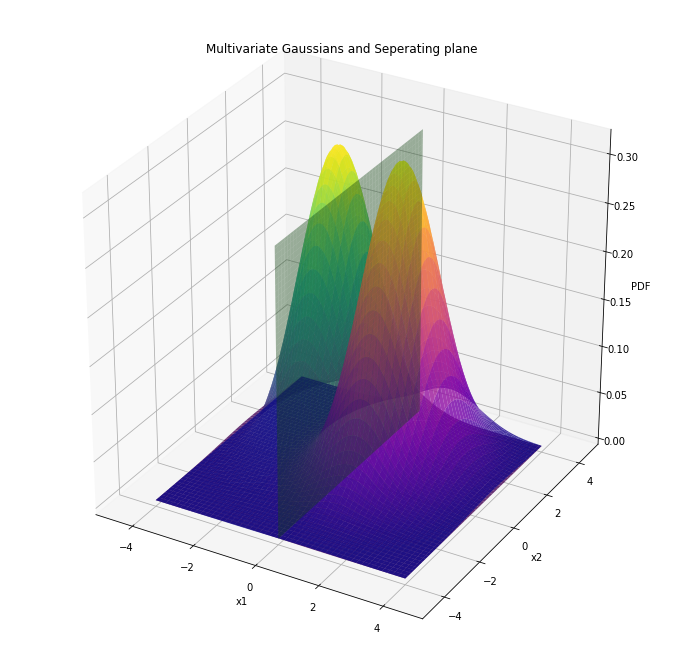

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
from scipy.linalg import sqrtm 
import plotly.graph_objects as go
from matplotlib import cm

############### Function for calculating the PDF ##############
def pdf(vals,mu,sigma):
  pdf2 = []
  I = np.eye(2)
  mu = np.array(mu).T
  mu = mu.reshape(2,1)
  for i in range(100):
    pdf1 = []
    for j in range(100):
      X = np.matrix([[vals[i,j,0]], [vals[i,j,1]]])
      
      X2 = X - mu

      pdf = (1/np.sqrt((2*np.pi)**2)*np.linalg.det(sigma)) * np.exp(-(np.linalg.solve(sigma, X2).T.dot(X2 / 2)))
      
      pdf1.append(pdf)
    pdf2.append(pdf1)

  pdf2 = np.array(pdf2)
  return pdf2

############### Function for plotting ##################
def plt_plot_bivariate_normal_pdf(mean, cov,mean2,cov2):

  X = np.linspace(-4,4,100)
  Y = np.linspace(-4,4,100)
  X,Y = np.meshgrid(X,Y)
  
  
  #y_p = X
  y_p = np.linspace(-4,4,100)  
  Z = np.linspace(0,0.3,100)
  y_p,Z = np.meshgrid(y_p,Z)
  x_p = y_p*0

  pos = np.empty(Y.shape + (2,))
  pos[:, :, 0] = X; pos[:, :, 1] = Y

  rv = pdf(pos,mean,cov)
  rv = rv[:,:,0,0]
  RV = pdf(pos,mean2,cov2)
  RV = RV[:,:,0,0]

  fig = plt.figure(figsize=(12,12))
  ax = fig.gca(projection='3d')

  ax.plot_surface(X, Y, rv,cmap='viridis',linewidth=0,alpha=0.8)
  ax.plot_surface(X, Y, RV,cmap='plasma',linewidth=0,alpha=0.8)
  ax.plot_surface(x_p,y_p,Z,alpha=0.4)
  ax.set_xlabel("x1")
  ax.set_ylabel("x2")
  ax.set_zlabel("PDF")
  ax.set_title("Multivariate Gaussians and Seperating plane")
  ax.set_xlim(-5,5)
  ax.set_ylim(-5,5)

################# Initialize means and covariance ##################
mu1 = np.array([-1, 1])
mu1 = mu1.T 
sigma1 = np.array([[1, 0], [0, 2]])

mu_1 = np.array([1, 1])
mu_1 = mu_1.T
sigma2 = np.array([[1, 0], [0, 2]])


plt_plot_bivariate_normal_pdf(mu1,sigma1,mu_1,sigma2)







